## 6* - BIFACIALvf Sky contributions

Runs bifacialvf for a day, and compares to same day without DNI, without DHI, and without DNI no albedo, without DHI no albedo to capture the contributions of Ground Reflected vs other sources of DNI and DHI.


In [5]:
testfolder = r'TEMP'
Resultsfolder = r'TEMP'
exampleflag = False
debugflag = False

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import pvlib
import datetime
import pprint
import os

## 6.a: Run bifacialvf

In [8]:
import bifacialvf

# Print bifacialvf Version:
bifacialvf.__version__

'0.1.7-dev1+32.g946cceb.dirty'

In [9]:
TMYtoread=os.path.join(testfolder,'SRRL_WeatherFile_TMY3_15.csv')
writefiletitle=os.path.join(Resultsfolder,'bifacialVF_Results_SRRLAlbedo_60min.csv')

# Variables
tilt = 10                   # PV tilt (deg)
sazm = 180                  # PV Azimuth(deg) or tracker axis direction
albedo = None               # Calculated in previous section from SRRL data. Value is 0.28 up to 11/18/19o
hub_height=1.5/2            #1.5m / 2m collector width
pitch = 2/0.35/2              # 1 / 0.35 where 0.35 is gcr --- row to row spacing in normalized panel lengths. 
rowType = "interior"        # RowType(first interior last single)
transFactor = 0             # TransmissionFactor(open area fraction)
sensorsy = 12                # sensorsy(# hor rows in panel)   <--> THIS ASSUMES LANDSCAPE ORIENTATION 
PVfrontSurface = "glass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "glass"     # PVbackSurface(glass or ARglass)

 # Calculate PV Output Through Various Methods    
calculateBilInterpol = False   # Only works with landscape at the moment.
calculatePVMismatch = False
portraitorlandscape='portrait'   # portrait or landscape
cellsnum = 72
bififactor = 1.0

# Tracking instructions
tracking=True
backtrack=True
limit_angle = 65

# Using YEARLY Albedo:
myTMY3, meta = bifacialvf.bifacialvf.readInputTMY(TMYtoread)


In [14]:
myTMY3.head()

,Date (MM/DD/YYYY),Time (HH:MM),Wspd,DryBulb,DHI,DNI,GHI,Alb
2019-06-01 01:00:00-07:00,6/1/2019,01:00,2.181867,11.875333,0.0,0.162716,0.0,0.0
2019-06-01 01:00:00-07:00,6/1/2019,01:15,1.491933,11.659333,0.0,0.000000,0.0,0.0
2019-06-01 01:00:00-07:00,6/1/2019,01:30,1.964667,11.024000,0.0,0.539131,0.0,0.0
2019-06-01 01:00:00-07:00,6/1/2019,01:45,2.129467,10.619333,0.0,0.000000,0.0,0.0
2019-06-01 02:00:00-07:00,6/1/2019,02:00,1.849400,10.528000,0.0,0.000000,0.0,0.0


In [15]:
myTMY3, meta = bifacialvf.bifacialvf.fixintervalTMY(myTMY3,meta)

In [16]:
myTMY3.head()

,Date (MM/DD/YYYY),Time (HH:MM),Wspd,DryBulb,DHI,DNI,GHI,Alb
Datetime,,,,,,,,
2019-06-01 01:00:00-07:00,6/1/2019,01:00,2.181867,11.875333,0.0,0.162716,0.0,0.0
2019-06-01 01:15:00-07:00,6/1/2019,01:15,1.491933,11.659333,0.0,0.000000,0.0,0.0
2019-06-01 01:30:00-07:00,6/1/2019,01:30,1.964667,11.024000,0.0,0.539131,0.0,0.0
2019-06-01 01:45:00-07:00,6/1/2019,01:45,2.129467,10.619333,0.0,0.000000,0.0,0.0
2019-06-01 02:00:00-07:00,6/1/2019,02:00,1.849400,10.528000,0.0,0.000000,0.0,0.0


In [19]:
filterdates = (myTMY3.index >= '2020-02-02 0:0:0 -7') & (myTMY3.index < '2020-02-03 0:0:0 -7')
myTMY3[filterdates]

,Date (MM/DD/YYYY),Time (HH:MM),Wspd,DryBulb,DHI,DNI,GHI,Alb
Datetime,,,,,,,,
2020-02-02 01:00:00-07:00,2/2/2020,01:00,1.885200,9.792667,0.000000,0.000000,0.000000,0.000000
2020-02-02 01:15:00-07:00,2/2/2020,01:15,2.156067,10.353333,0.000000,0.000000,0.000000,0.000000
2020-02-02 01:30:00-07:00,2/2/2020,01:30,2.097733,9.656667,0.000000,0.000000,0.000000,0.000000
2020-02-02 01:45:00-07:00,2/2/2020,01:45,2.153667,9.108000,0.000000,0.000000,0.000000,0.000000
2020-02-02 02:00:00-07:00,2/2/2020,02:00,2.371067,8.954000,0.000000,0.000000,0.000000,0.000000
2020-02-02 02:15:00-07:00,2/2/2020,02:15,2.211933,9.186000,0.000000,0.000000,0.000000,0.000000
2020-02-02 02:30:00-07:00,2/2/2020,02:30,1.870200,9.385333,0.000000,0.000000,0.000000,0.000000
2020-02-02 02:45:00-07:00,2/2/2020,02:45,2.002800,9.778000,0.000000,0.000000,0.000000,0.000000
2020-02-02 03:00:00-07:00,2/2/2020,03:00,1.804400,8.994667,0.000000,0.000000,0.000000,0.000000


In [20]:
writefiletitle=os.path.join(Resultsfolder,'bifacialVF_02_02.csv')

bifacialvf.simulate(myTMY3[filterdates], meta, writefiletitle=writefiletitle, 
         tilt=tilt, sazm=sazm, pitch=pitch, hub_height=hub_height, 
         rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
         PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
         albedo=albedo, tracking=tracking, backtrack=backtrack, 
         limit_angle=limit_angle, calculatePVMismatch=calculatePVMismatch,
         cellsnum = cellsnum, bififactor=bififactor,
         calculateBilInterpol=calculateBilInterpol,
         portraitorlandscape=portraitorlandscape)


Interval in weather data is less than 1 hr, calculating Sun position with a delta of - 7
If you want no delta for sunposition, run simulation with input variable deltastyle='exact'


c:\users\sayala\documents\github\bifacialvf\bifacialvf\bifacialvf.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  myTMY3['zenith'] = np.radians(solpos['zenith'])
c:\users\sayala\documents\github\bifacialvf\bifacialvf\bifacialvf.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  myTMY3['azimuth'] = np.radians(solpos['azimuth'])
c:\users\sayala\documents\github\bifacialvf\bifacialvf\bifacialvf.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

Using albedo from TMY3 file.
Note that at the moment, no validation check is done in the albedo data, so we assume it's correct and valid.

 
********* 
Running Simulation for TMY3: 
Location:    DENVER/CENTENNIAL [GOLDEN - NREL]
Lat:  39.742  Long:  -105.179  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.75   Pitch:  2.857142857142857   Row type:  interior   Albedo:  None
Saving into BEST_Sam_PVsyst_BR_BVF_Results\bifacialVF_02_02.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  1.8571428571428572
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True


100%|██████████| 92/92 [00:01<00:00, 48.17it/s] 


Finished


In [23]:
noDNI = myTMY3[filterdates].copy()
noDNI['DNI'] = 0

In [ ]:
noDNI.iloc[40:50]

In [33]:
noDHI = myTMY3[filterdates].copy()
noDHI['DHI'] = 0

In [35]:
noDNInoAlb = myTMY3[filterdates].copy()
noDNInoAlb['DNI'] = 0
noDNInoAlb['Alb'] = 0.00000000000001


In [36]:
noDHInoAlb = myTMY3[filterdates].copy()
noDHInoAlb['DHI'] = 0
noDHInoAlb['Alb'] = 0.00000000000001


In [41]:
cases = [noDNI, noDHI, noDNInoAlb, noDHInoAlb]
titles = ['noDNI', 'noDHI', 'noDNInoAlb', 'noDHInoAlb']

for i in range (0, len(cases)):
    title = 'bifacialVF_02_02_'+titles[i]+'.csv'
    case = cases[i]
    
    writefiletitle=os.path.join(Resultsfolder, title)

    bifacialvf.simulate(case, meta, writefiletitle=title, 
             tilt=tilt, sazm=sazm, pitch=pitch, hub_height=hub_height, 
             rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
             PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
             albedo=albedo, tracking=tracking, backtrack=backtrack, 
             limit_angle=limit_angle, calculatePVMismatch=calculatePVMismatch,
             cellsnum = cellsnum, bififactor=bififactor,
             calculateBilInterpol=calculateBilInterpol,
             portraitorlandscape=portraitorlandscape)


Interval in weather data is less than 1 hr, calculating Sun position with a delta of - 7
If you want no delta for sunposition, run simulation with input variable deltastyle='exact'
Using albedo from TMY3 file.
Note that at the moment, no validation check is done in the albedo data, so we assume it's correct and valid.

 
********* 
Running Simulation for TMY3: 
Location:    DENVER/CENTENNIAL [GOLDEN - NREL]
Lat:  39.742  Long:  -105.179  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.75   Pitch:  2.857142857142857   Row type:  interior   Albedo:  None
Saving into bifacialVF_02_02_noDNI.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  1.8571428571428572
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True


100%|██████████| 92/92 [00:02<00:00, 37.59it/s] 


Finished
Interval in weather data is less than 1 hr, calculating Sun position with a delta of - 7
If you want no delta for sunposition, run simulation with input variable deltastyle='exact'
Using albedo from TMY3 file.
Note that at the moment, no validation check is done in the albedo data, so we assume it's correct and valid.

 
********* 
Running Simulation for TMY3: 
Location:    DENVER/CENTENNIAL [GOLDEN - NREL]
Lat:  39.742  Long:  -105.179  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.75   Pitch:  2.857142857142857   Row type:  interior   Albedo:  None
Saving into bifacialVF_02_02_noDHI.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  1.8571428571428572
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True


100%|██████████| 92/92 [00:01<00:00, 48.42it/s] 


Finished
Interval in weather data is less than 1 hr, calculating Sun position with a delta of - 7
If you want no delta for sunposition, run simulation with input variable deltastyle='exact'
Using albedo from TMY3 file.
Note that at the moment, no validation check is done in the albedo data, so we assume it's correct and valid.

 
********* 
Running Simulation for TMY3: 
Location:    DENVER/CENTENNIAL [GOLDEN - NREL]
Lat:  39.742  Long:  -105.179  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.75   Pitch:  2.857142857142857   Row type:  interior   Albedo:  None
Saving into bifacialVF_02_02_noDNInoAlb.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  1.8571428571428572
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True


100%|██████████| 92/92 [00:01<00:00, 46.74it/s] 


Finished
Using albedo from TMY3 file.
Note that at the moment, no validation check is done in the albedo data, so we assume it's correct and valid.

 
********* 
Running Simulation for TMY3: 
Location:    DENVER/CENTENNIAL [GOLDEN - NREL]
Lat:  39.742  Long:  -105.179  Tz  -7.0
Parameters: tilt:  0   Sazm:  180     Hub_Height :  0.75   Pitch:  2.857142857142857   Row type:  interior   Albedo:  None
Saving into bifacialVF_02_02_noDHInoAlb.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  1.8571428571428572
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True


100%|██████████| 92/92 [00:02<00:00, 44.56it/s] 


Finished


In [65]:
# ANALYSE DATA

titles = ['','_noDNI', '_noDHI', '_noDNInoAlb', '_noDHInoAlb']

compiled_RearIrrad = []

for i in range (0, len(titles)):
    title = 'bifacialVF_02_02'+titles[i]+'.csv'
    writefiletitle=os.path.join(Resultsfolder, title)
    
    data, meta = bifacialvf.loadVFresults(writefiletitle)
    
    filterAzm = (data['sazm'] == 270)
    data['fixed_RowBackGTI_1'] = data['No_1_RowBackGTI'] 
    data['fixed_RowBackGTI_1'][filterAzm] = data['No_12_RowBackGTI'][filterAzm]
    compiled_RearIrrad.append(data['fixed_RowBackGTI_1'].sum())
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [72]:
compiled_RearIrrad

[1460.4823156355387,
 310.6296315947487,
 1081.8597617385333,
 112.7044215585174,
 4.943156949814155e-11]

In [88]:
print("Full simulation rear irradiance", compiled_RearIrrad[0])
print("Dni + DHI modeled separately", compiled_RearIrrad[1]+compiled_RearIrrad[2])
print("% from original", (compiled_RearIrrad[1]+compiled_RearIrrad[2])*100/compiled_RearIrrad[0])

Full simulation rear irradiance 1460.4823156355387
Dni + DHI modeled separately 1392.489393333282
% from original 95.34448849025131


In [89]:
#labels = 'noDNI', 'noDHI', '_noDNInoAlb', '_noDHInoAlb'
# labels aka DHI     DNI    DHI other sources     DNI other sources
DHIonly = compiled_RearIrrad[1] 
DNIonly = compiled_RearIrrad[2]
DHIotherSources = compiled_RearIrrad[3] 
DNIotherSources = compiled_RearIrrad[4] 
ground_reflected_DHI = DHIonly-DHIotherSources
ground_reflected_DNI = DNIonly - DNIotherSources


1392.489393333282

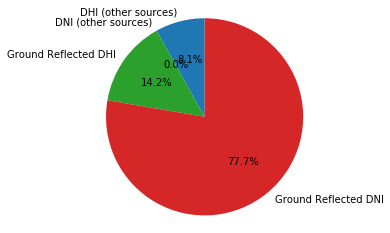

In [90]:
labels = 'DHI (other sources)',  'DNI (other sources)', 'Ground Reflected DHI','Ground Reflected DNI'
sizes = [DHIotherSources, DNIotherSources, ground_reflected_DHI, ground_reflected_DNI]
    
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
